In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
#filename_base = "xp2_migr_20180619084743" # 20, 0
#filename_base="xp2_migr_20180619094324" #20,25
#filename_base="xp2_migr_20180618225904" # 20, 50

experiments = glob.glob("./results/*")

df = None
df_migr = None
df_agent = None

for experiment in experiments:
    filename_base = experiment.split("/")[2]
    experiment=filename_base
    #filename_base="xp2_migr_20180621170259_50_0" # 50 agents, 0 active processes (which are going to be migrated)
    #filename_base="xp2_migr_20180623033156_50_25" # 50,25
    #filename_base="xp2_migr_20180623151601_50_50" #50,50
    test_descriptor=None
    split_experiment = filename_base.split("_")
    if len(split_experiment)<6:
        continue
    if experiment.find("xp3") == -1:
        continue
    
    if split_experiment[3] != '100':
        continue
    
    files = glob.glob("./results/{0}/*.csv".format(filename_base))
    print (experiment)
    for f in files:
        
        #print (f)
        filename=os.path.basename(f)
        name = filename.split(".")[0].split("_")
        #print (name)
        if ("_pre_" in filename) or ("_post_" in filename):
            df_tmp = pd.read_csv(f,parse_dates=["start", "end"], sep=",")
            
            df_tmp["experiment"] = filename_base
            df_tmp["agent_nb"] = int(split_experiment[3])
            df_tmp["active_process_nb"] = int(split_experiment[4])
            
            #df_tmp["faban_agent"] = int(name[4])
            df_tmp["tenant"] = name[7]
            df_tmp["bpm"] = split_experiment[5]
            if "_pre_" in filename:
                df_tmp["type"] = "pre"
            if "_post_" in filename:
                df_tmp["type"] = "post"
            df_tmp["taskId"] = df_tmp["task_id"]
            df_tmp["relative_start_tenant"] = (df_tmp["start"] - df_tmp["start"].min()).astype("timedelta64[ms]")
            #df_tmp = df_tmp.set_index(["task_id","type", "agent_nb", "active_process_nb"])
            if df is None:
                df = df_tmp
            else:
                df = pd.concat([df, df_tmp])
        if (len(name) > 4 and (name[6] == "migr")):
            df_tmp = pd.read_csv(f, names = ["ts","nb","duration_disable","duration_move","duration_enable","duration_total"])
            df_tmp["ts"] = pd.to_datetime(df_tmp["ts"])
            df_tmp["experiment"] = filename_base
            df_tmp["bpm"] = split_experiment[5]
            if df_migr is None:
                df_migr = df_tmp
            else:
                df_migr = pd.concat([df_migr, df_tmp])
        if filename=="test_descriptor.csv":
            with open(f, mode='r') as infile:
                reader = csv.reader(infile)
                test_descriptor = dict((rows[0],rows[1]) for rows in reader)
        if ("_agent" in filename):
            df_tmp = pd.read_csv(f, sep=",", dtype={'taskId':int},parse_dates=["Req_retrieve_Time","Resp_retrieve_Time","Req_Assign_Tim","Resp_Assign_Time","Req_exec_Time","Resp_exec_Time","Retrive_Time","Assign_Time","Exec_Time"])
            df_tmp["experiment"] = filename_base
            if "pre_" in filename:
                df_tmp["type"] = "pre"
            if "post_" in filename:
                df_tmp["type"] = "post"
            #df_tmp["agent_nb"] = int(split_experiment[3])
            #df_tmp["active_process_nb"] = int(split_experiment[4])
            #df_tmp["faban_agent"] = int(name[4])    
            df_tmp["tenant"] = name[8]
            #df_tmp = df_tmp.set_index(["taskId","type", "agent_nb", "active_process_nb"])
            
            if df_agent is None:
                df_agent = df_tmp
            else:
                df_agent = pd.concat([df_agent, df_tmp])
    
    if test_descriptor is not None and df is not None:
        print(test_descriptor["faban_agents"])
        df.loc[(df.experiment == experiment, "faban_agents")] = test_descriptor["faban_agents"]
        df.loc[(df.experiment == experiment, "bpm")] = test_descriptor["bpm"]


df

#
#all_data

xp3_migr_32-100_100_50_additionalApproval
1
xp3_m_34_100_0_additionalApproval
1
xp3_migr_22-100_100_200_TestHumanTask
1
xp3_migr_22-100_100_200_M3Process
1
xp3_m_35_100_100_additionalApproval
1
xp3_migr_21-100_100_100_TestHumanTask
1
xp3_m_32_100_200_additionalApproval
1
xp3_migr_21-100_100_0_M3Process
1
xp3_m_35_100_50_additionalApproval
1
xp3_m_33_100_200_additionalApproval
1
xp3_m_32_100_50_TestHumanTask
1
xp3_migr_23-100_100_50_M3Process
1
xp3_migr_23-100_100_50_TestHumanTask
1
xp3_migr_21-100_100_200_M3Process
1
xp3_migr_23-100_100_200_M3Process
1
xp3_migr_21-100_100_100_M3Process
1
xp3_m_34_100_50_TestHumanTask
1
xp3_m_35_100_200_TestHumanTask
1
xp3_m_34_100_50_M3Process
1
xp3_migr_31-100_100_50_additionalApproval
1
xp3_m_34_100_200_M3Process
1
xp3_m_32_100_100_additionalApproval
1
xp3_m_35_100_100_TestHumanTask
1
xp3_m_35_100_200_additionalApproval
1
xp3_m_34_100_200_additionalApproval
1
xp3_m_35_100_0_M3Process
1
xp3_m_34_100_200_TestHumanTask
1
xp3_m_34_100_100_TestHumanTask
1

,Unnamed: 0,active_process_nb,agent_nb,bpm,duration,end,experiment,faban_agents,id,ready,relative_start_tenant,start,taskId,task_assign,task_end,task_id,task_ready,task_start,tenant,type
0,0,50,100,additionalApproval-2.0.bar,118447.0,2018-07-22 06:36:47.239,xp3_migr_32-100_100_50_additionalApproval,1,1,1.532241e+12,0.0,2018-07-22 06:34:48.792,8.0,1.532241e+12,1.532241e+12,8.0,1.532241e+12,1.532241e+12,tenant2,post
1,1,50,100,additionalApproval-2.0.bar,118447.0,2018-07-22 06:36:47.239,xp3_migr_32-100_100_50_additionalApproval,1,1,1.532241e+12,0.0,2018-07-22 06:34:48.792,505.0,1.532241e+12,1.532241e+12,505.0,1.532241e+12,1.532241e+12,tenant2,post
2,2,50,100,additionalApproval-2.0.bar,118447.0,2018-07-22 06:36:47.239,xp3_migr_32-100_100_50_additionalApproval,1,1,1.532241e+12,0.0,2018-07-22 06:34:48.792,1137.0,1.532241e+12,1.532241e+12,1137.0,1.532241e+12,1.532241e+12,tenant2,post
3,3,50,100,additionalApproval-2.0.bar,118447.0,2018-07-22 06:36:47.239,xp3_migr_32-100_100_50_additionalApproval,1,1,1.532241e+12,0.0,2018-07-22 06:34:48.792,2180.0,1.532241e+12,1.532241e+12,2180.0,1.532241e+12,1.532241e+12,tenant2,post
4,4,50,100,additionalApproval-2.0.bar,118447.0,2018-07-22 06:36:47.239,xp3_migr_32-100_100_50_additionalApproval,1,1,1.532241e+12,0.0,2018-07-22 06:34:48.792,4846.0,1.532241e+12,1.532241e+12,4846.0,1.532241e+12,1.532241e+12,tenant2,post
5,5,50,100,additionalApproval-2.0.bar,84075.0,2018-07-22 06:36:13.259,xp3_migr_32-100_100_50_additionalApproval,1,2,1.532241e+12,392.0,2018-07-22 06:34:49.184,14.0,1.532241e+12,1.532241e+12,14.0,1.532241e+12,1.532241e+12,tenant2,post
6,6,50,100,additionalApproval-2.0.bar,84075.0,2018-07-22 06:36:13.259,xp3_migr_32-100_100_50_additionalApproval,1,2,1.532241e+12,392.0,2018-07-22 06:34:49.184,565.0,1.532241e+12,1.532241e+12,565.0,1.532241e+12,1.532241e+12,tenant2,post
7,7,50,100,additionalApproval-2.0.bar,84075.0,2018-07-22 06:36:13.259,xp3_migr_32-100_100_50_additionalApproval,1,2,1.532241e+12,392.0,2018-07-22 06:34:49.184,1275.0,1.532241e+12,1.532241e+12,1275.0,1.532241e+12,1.532241e+12,tenant2,post
8,8,50,100,additionalApproval-2.0.bar,84075.0,2018-07-22 06:36:13.259,xp3_migr_32-100_100_50_additionalApproval,1,2,1.532241e+12,392.0,2018-07-22 06:34:49.184,2162.0,1.532241e+12,1.532241e+12,2162.0,1.532241e+12,1.532241e+12,tenant2,post
9,9,50,100,additionalApproval-2.0.bar,84075.0,2018-07-22 06:36:13.259,xp3_migr_32-100_100_50_additionalApproval,1,2,1.532241e+12,392.0,2018-07-22 06:34:49.184,3304.0,1.532241e+12,1.532241e+12,3304.0,1.532241e+12,1.532241e+12,tenant2,post


In [25]:
df_migr.index = df_migr["ts"]
df_migr

,ts,nb,duration_disable,duration_move,duration_enable,duration_total,experiment,bpm,min_start,relative_start,relative_end,end_pre,begin_post,end_post,begin_pre
ts,,,,,,,,,,,,,,,
2018-07-22 06:42:22.757577,2018-07-22 06:42:22.757577,50,1.506564,5.970709,6.153373,13.630646,xp3_migr_32-100_100_50_additionalApproval,additionalApproval,2018-07-22 06:34:44.347,458410.0,472040.645990,136700,582237,714280,4445.0
2018-07-24 09:45:07.376447,2018-07-24 09:45:07.376447,445,0.756077,9.105005,4.880429,14.741511,xp3_m_34_100_0_additionalApproval,additionalApproval,2018-07-24 09:37:22.768,464608.0,479349.511106,143986,587106,728850,6689.0
2018-07-22 05:25:02.687935,2018-07-22 05:25:02.687935,200,0.338632,4.758050,2.712086,7.808768,xp3_migr_22-100_100_200_TestHumanTask,TestHumanTask,2018-07-22 05:17:34.020,448667.0,456475.767796,136870,559802,690178,5556.0
2018-07-21 16:05:15.760919,2018-07-21 16:05:15.760919,100,0.595491,5.726251,7.236631,13.558373,xp3_migr_22-100_100_200_M3Process,M3Process,2018-07-21 15:57:51.360,444400.0,457958.372736,134323,562837,695388,783.0
2018-07-24 17:17:08.573547,2018-07-24 17:17:08.573547,100,0.272978,5.636503,5.405456,11.314937,xp3_m_35_100_100_additionalApproval,additionalApproval,2018-07-24 17:09:26.320,462253.0,473567.937115,143103,581292,710801,4891.0
2018-07-22 13:11:57.955972,2018-07-22 13:11:57.955972,100,0.169581,3.889748,2.743010,6.802339,xp3_migr_21-100_100_100_TestHumanTask,TestHumanTask,2018-07-22 13:04:32.142,445813.0,452615.339077,138327,552204,683020,5974.0
2018-07-23 00:42:51.750430,2018-07-23 00:42:51.750430,200,0.821520,6.044182,6.852511,13.718213,xp3_m_32_100_200_additionalApproval,additionalApproval,2018-07-23 00:35:13.040,458710.0,472428.213081,139842,582758,711301,0.0
2018-07-20 10:18:50.214529,2018-07-20 10:18:50.214529,0,0.456876,4.050150,4.657834,9.164860,xp3_migr_21-100_100_0_M3Process,M3Process,2018-07-20 10:11:15.201,455013.0,464177.859772,136598,568549,700448,2863.0
2018-07-24 14:45:44.094824,2018-07-24 14:45:44.094824,50,1.066909,15.933664,4.486914,21.487487,xp3_m_35_100_50_additionalApproval,additionalApproval,2018-07-24 14:38:06.262,457832.0,479319.487078,141277,584698,717073,4139.0


In [6]:
#df["relative_start"] = (df["start"] - df["start"].min()).astype("timedelta64[ms]")
min_start = pd.to_datetime(df.groupby("experiment")["start"].min())
min_task_start = df.groupby("experiment")["task_start"].min()


df_migr["min_start"] = None
df["min_start"] = None
df["min_agent_task_start"] = None

for ind in min_start.index:
    df.loc[df.experiment == ind, "min_start"] = pd.to_datetime(min_start[ind])
    df_migr.loc[df_migr.experiment == ind, "min_start"]  = pd.to_datetime(min_start[ind])
for ind in min_start.index:
    df.loc[df.experiment == ind, "min_task_start"] = pd.to_datetime(min_start[ind])
   
df_migr["min_start"] = pd.to_datetime(df_migr["min_start"])
df["min_start"] = pd.to_datetime(df["min_start"])
df_migr["relative_start"] = (df_migr["ts"]-df_migr["min_start"]).astype("timedelta64[ms]")
df["relative_start"] = (df["start"]-df["min_start"]).astype("timedelta64[ms]")
df["relative_end"] = (df["end"]-df["min_start"]).astype("timedelta64[ms]")

df["relative_task_start"] = (df["task_start"].astype("datetime64[ms]")-df["min_task_start"]).astype("timedelta64[ms]")
df["relative_task_end"] = (df["task_end"].astype("datetime64[ms]")-df["min_task_start"]).astype("timedelta64[ms]")



df_migr["relative_end"] = df_migr["relative_start"] + df_migr["duration_total"]*1000
df_migr["end_pre"] = None
df_migr["begin_post"] = None
df_migr["end_post"] = None
for experiment in df_migr.experiment:
    print(experiment)
    #print(df_migr[df_migr["experiment"] == experiment]["relative_start"])
    #print("{0}-{1}".format(experiment, df_migr[df_migr["experiment"] == experiment]["relative_start"].item()))
    dd = df_migr[df_migr["experiment"] == experiment]["relative_start"].item()
    df.loc[(df.tenant=="tenant2")&(df.relative_start<dd), "type"] = "pre"
    
    m = df_migr[df_migr["experiment"] == experiment]["relative_start"].item()
    df.loc[df.experiment == experiment, "begin_migr"] = m
    m = df_migr[df_migr["experiment"] == experiment]["relative_end"].item()
    df.loc[df.experiment == experiment, "end_migr"] = m
    
    m = df[(df.tenant=="tenant2")&(df.experiment == experiment)&(df.type=="pre")]["relative_start"].min()
    df_migr.loc[(df_migr.experiment == experiment, "begin_pre")] = m
    df.loc[df.experiment == experiment, "begin_pre"] = m
    
    m = df[(df.tenant=="tenant2")&(df.experiment == experiment)&(df.type=="pre")]["relative_start"].max()
    df_migr.loc[(df_migr.experiment == experiment, "end_pre")] = m
    df.loc[df.experiment == experiment, "end_pre"] = m

    m = df[(df.tenant=="tenant2")&(df.experiment == experiment)&(df.type=="post")]["relative_start"].min()
    df_migr.loc[(df_migr.experiment == experiment, "begin_post")] = m
    df.loc[df.experiment == experiment, "begin_post"] = m

    m = df[(df.tenant=="tenant2")&(df.experiment == experiment)&(df.type=="post")]["relative_start"].max()
    df_migr.loc[(df_migr.experiment == experiment, "end_post")] = m
    df.loc[df.experiment == experiment, "end_post"] = m
    m = df_migr[df_migr["experiment"] == experiment]["nb"].item()
    df.loc[df.experiment == experiment, "nb"] = m
    print ("done")

xp3_migr_32-100_100_50_additionalApproval
ts
2018-07-22 06:42:22.757577    458410.0
Name: relative_start, dtype: float64
xp3_migr_32-100_100_50_additionalApproval-458410.0
done
xp3_m_34_100_0_additionalApproval
ts
2018-07-24 09:45:07.376447    464608.0
Name: relative_start, dtype: float64
xp3_m_34_100_0_additionalApproval-464608.0
done
xp3_migr_22-100_100_200_TestHumanTask
ts
2018-07-22 05:25:02.687935    448667.0
Name: relative_start, dtype: float64
xp3_migr_22-100_100_200_TestHumanTask-448667.0
done
xp3_migr_22-100_100_200_M3Process
ts
2018-07-21 16:05:15.760919    444400.0
Name: relative_start, dtype: float64
xp3_migr_22-100_100_200_M3Process-444400.0
done
xp3_m_35_100_100_additionalApproval
ts
2018-07-24 17:17:08.573547    462253.0
Name: relative_start, dtype: float64
xp3_m_35_100_100_additionalApproval-462253.0
done
xp3_migr_21-100_100_100_TestHumanTask
ts
2018-07-22 13:11:57.955972    445813.0
Name: relative_start, dtype: float64
xp3_migr_21-100_100_100_TestHumanTask-445813.0
don

In [7]:
df_agent["min_agent_task_start"]=None
min_agent_task_start = pd.to_datetime(df_agent.groupby("experiment")["Req_retrieve_Time"].min())
print (df_agent.describe())
for ind in min_agent_task_start.index:
    print ("{0} {1}".format(ind, min_agent_task_start[ind]))
    df_agent.loc[df_agent.experiment == ind, "min_agent_task_start"] = min_agent_task_start[ind]
df_agent["min_agent_task_start"] = pd.to_datetime(df_agent["min_agent_task_start"])
print (df_agent[["Req_retrieve_Time","min_agent_task_start"]].dtypes)    
df_agent["relative_agent_task_start"] = (df_agent["Req_retrieve_Time"]-df_agent["min_agent_task_start"]).astype("timedelta64[ms]")
df_agent["relative_agent_task_end"] = (df_agent["Resp_exec_Time"]-df_agent["min_agent_task_start"]).astype("timedelta64[ms]")
 

             taskId
count  2.103212e+06
mean   5.334906e+04
std    4.285149e+04
min    2.000000e+00
25%    1.951700e+04
50%    4.056300e+04
75%    8.438100e+04
max    1.717340e+05
xp3_m_31_100_0_M3Process 2018-07-23 22:11:09.452000
xp3_m_31_100_0_additionalApproval 2018-07-23 21:46:23.138000
xp3_m_31_100_100_additionalApproval 2018-07-22 19:52:20.490000
xp3_m_31_100_200_additionalApproval 2018-07-22 21:10:05.662000
xp3_m_31_100_50_TestHumanTask 2018-07-23 14:29:20.331000
xp3_m_32_100_0_additionalApproval 2018-07-23 01:28:31.305000
xp3_m_32_100_100_additionalApproval 2018-07-22 20:16:51.523000
xp3_m_32_100_200_additionalApproval 2018-07-23 00:35:32.316000
xp3_m_32_100_50_TestHumanTask 2018-07-23 14:53:51.965000
xp3_m_33_100_0_additionalApproval 2018-07-23 01:53:02.117000
xp3_m_33_100_100_additionalApproval 2018-07-22 20:41:21.282000
xp3_m_33_100_200_additionalApproval 2018-07-23 01:00:11.334000
xp3_m_34_100_0_M3Process 2018-07-24 00:51:29.194000
xp3_m_34_100_0_TestHumanTask 2018-07-24 1

In [8]:
all_data = pd.merge(df, df_agent, on=["tenant","taskId", "experiment"])
#all_data = pd.merge(df, df_agent, on=["taskId"])

all_data["ready"] = pd.to_datetime(all_data["ready"]/1000, unit="s")

all_data["task_start"] = pd.to_datetime(all_data["task_start"]/1000, unit="s")
all_data["task_ready"] = pd.to_datetime(all_data["task_ready"]/1000, unit="s")
all_data["task_assign"] = pd.to_datetime(all_data["task_assign"]/1000, unit="s")
all_data["task_end"] = pd.to_datetime(all_data["task_end"]/1000, unit="s")
all_data["duration_agent"] = ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"]) + (all_data["Req_retrieve_Time"] - all_data["task_ready"])).astype('timedelta64')
all_data["duration_restricted"] = (all_data["end"] - all_data["start"] - ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"]) + (all_data["Req_retrieve_Time"] - all_data["task_ready"]))).astype('timedelta64[ms]')
all_data["retrieve_duration"] = (all_data["Req_retrieve_Time"] - all_data["task_ready"]).astype('timedelta64[ms]')
#all_data = all_data[all_data["relative_start"] <= 35000]
#all_data = all_data[all_data["tenant"] != "tenant3"]
all_data["bpms_task_exec"]=(all_data["task_end"]-all_data["task_start"]).astype("timedelta64[ms]")
all_data["agentbpm_task_exec"]=(all_data["Resp_exec_Time"]-all_data["Req_retrieve_Time"]).astype("timedelta64[ms]")
all_data["agentbpm_task_exec_restricted"]= all_data["agentbpm_task_exec"] - ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"])).astype('timedelta64[ms]')



g = sns.FacetGrid(all_data,  row="experiment", col="tenant", hue="type_y", size=5)
g = g.map(plt.scatter, "relative_start", "duration", s=1)
for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_pre"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_pre"].item(),  linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_post"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_post"].item(),  linestyle="--",alpha=0.5, color='blue')
            

g = sns.FacetGrid(all_data, col="tenant",  row="experiment", hue="type_y", size=6)
g = g.map(plt.scatter, "relative_task_start", "bpms_task_exec", s=1)
print (g)
for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_pre"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_pre"].item(),  linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_post"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_post"].item(),  linestyle="--",alpha=0.5, color='blue')
            

g = sns.FacetGrid(all_data, col="tenant",  row="experiment", hue="type_y", size=6)
g = g.map(plt.scatter, "relative_start", "agentbpm_task_exec_restricted", s=1)
print (g)
for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_pre"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_pre"].item(),  linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_post"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_post"].item(),  linestyle="--",alpha=0.5, color='blue')
            

all_data_around_migr =  all_data[(all_data.relative_task_start > all_data.begin_migr - 60000) & (all_data.relative_task_start< all_data.end_migr+60000)]
g = sns.FacetGrid(all_data_around_migr, col="tenant",  row="experiment", hue="type_y", size=8)
g = g.map(plt.scatter, "relative_task_start", "agentbpm_task_exec_restricted", s=1)
print (g)
for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
            

all_data_around_migr =  all_data[(all_data.relative_task_start > all_data.begin_migr - 60000) & (all_data.relative_task_start< all_data.end_migr+60000)]
g = sns.FacetGrid(all_data_around_migr, col="tenant",  row="experiment", hue="type_y", size=8)
g = g.map(plt.scatter, "relative_task_start", "bpms_task_exec", s=1)
print (g)
for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
            

In [39]:
all_data["is_migration"] = False
all_data.loc[
    (all_data.relative_task_end >= all_data.begin_migr) 
    & (all_data.relative_task_start< all_data.end_migr)
    & (all_data.tenant != "tenant2"), "is_migration"] = True
all_data_restrict = all_data.loc[
    ((all_data.relative_task_end < all_data.begin_migr) 
    & (all_data.relative_task_end> all_data.begin_migr-60000)
    & (all_data.tenant != "tenant2")) | (all_data.is_migration == True)]
all_data_restrict = all_data_restrict[all_data_restrict.nb.isin([25,50,100,200,0])]

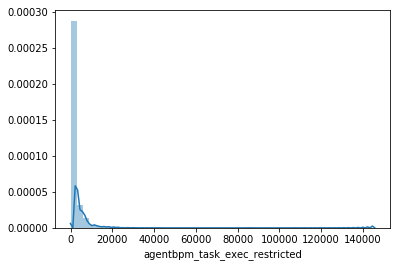

In [10]:
sns.distplot(all_data["agentbpm_task_exec_restricted"].dropna());
#sns.distplot(all_data["agentbpm_task_exec_restricted"]);

Text(0.5,21.7062,u'Number of active processes')

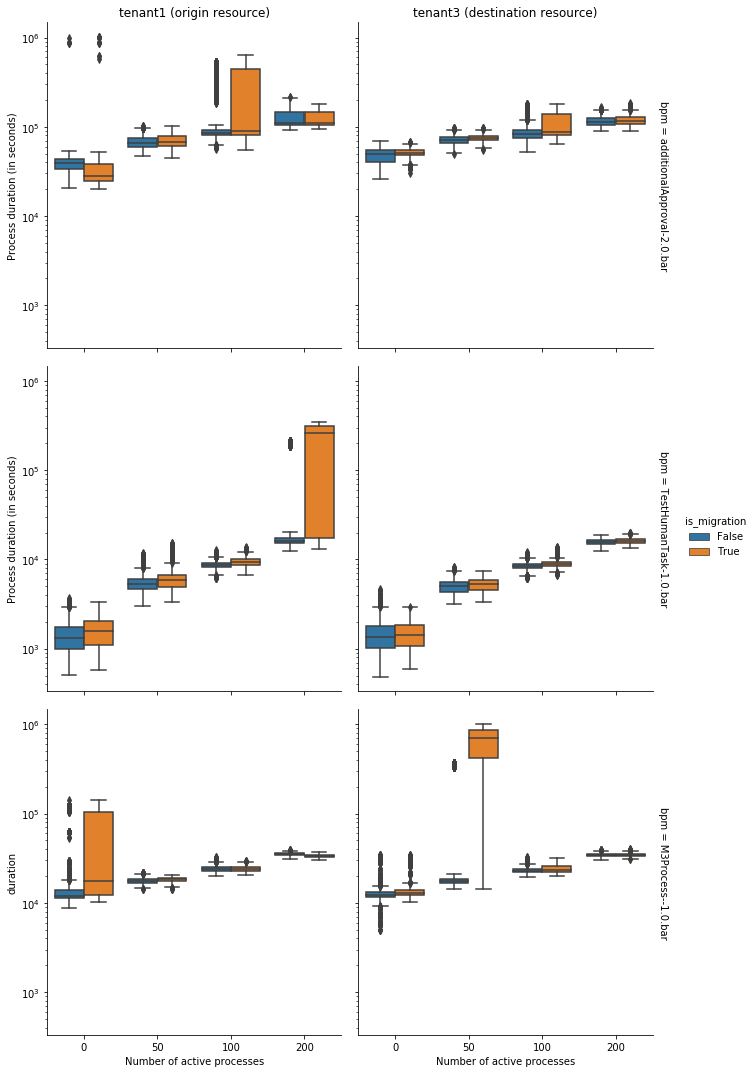

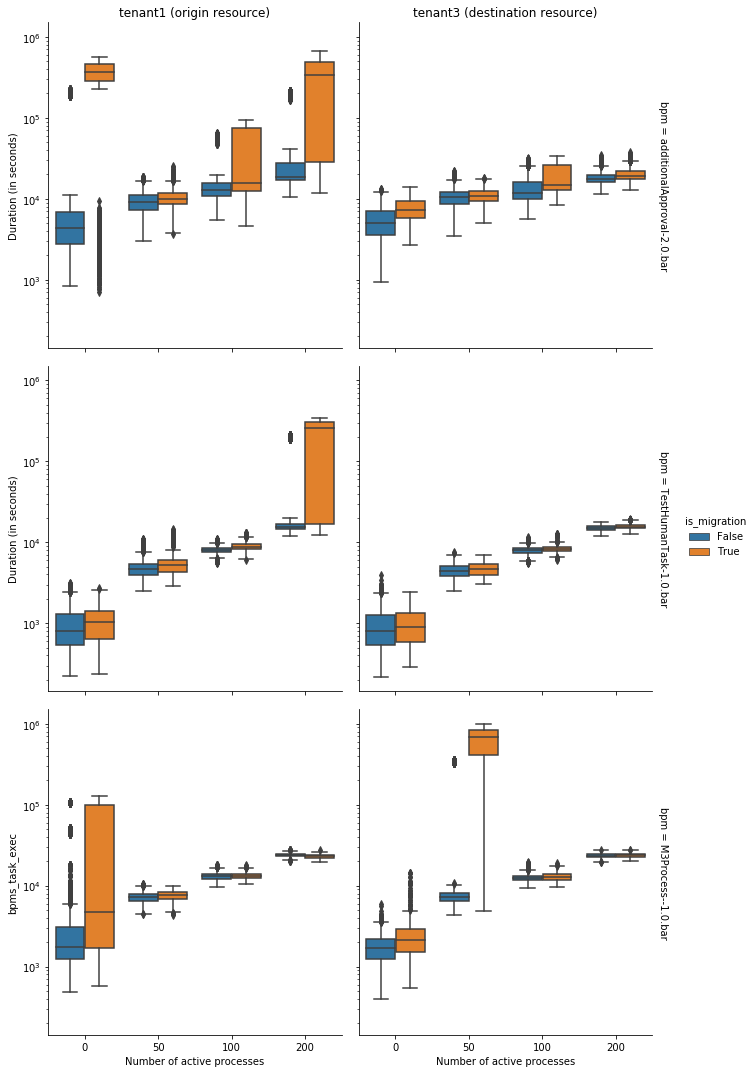

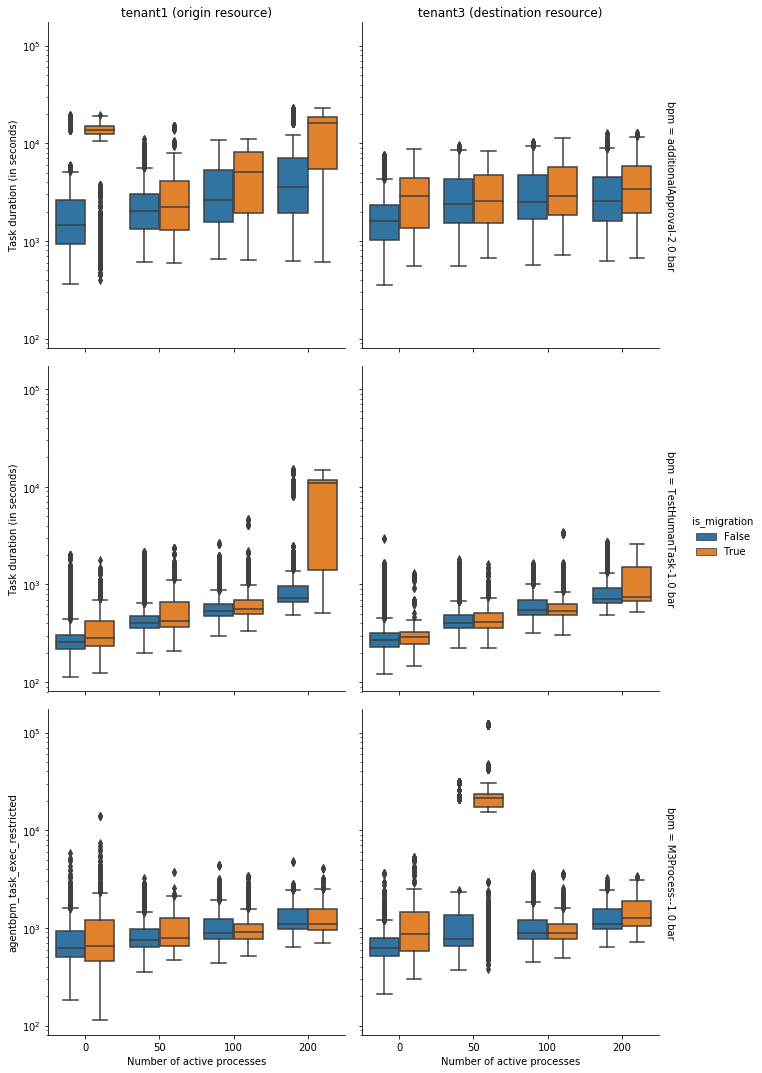

In [41]:
g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="duration", data=all_data_restrict, kind="box", margin_titles=True)
g.set(yscale="log")
axes = g.axes.flatten()
axes[0].set_title("tenant1 (origin resource)")
axes[1].set_title("tenant3 (destination resource)")
axes[0].set_ylabel("Process duration (in seconds)")
axes[2].set_ylabel("Process duration (in seconds)")
axes[2].set_ylabel("Process duration (in seconds)")
axes[4].set_xlabel("Number of active processes")
axes[5].set_xlabel("Number of active processes")
g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="bpms_task_exec", data=all_data_restrict, kind="box", margin_titles=True)
g.set(yscale="log")
axes = g.axes.flatten()
axes[0].set_title("tenant1 (origin resource)")
axes[1].set_title("tenant3 (destination resource)")
axes[0].set_ylabel("Duration (in seconds)")
axes[2].set_ylabel("Duration (in seconds)")
axes[2].set_ylabel("Duration (in seconds)")
axes[4].set_xlabel("Number of active processes")
axes[5].set_xlabel("Number of active processes")
g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="agentbpm_task_exec_restricted", data=all_data_restrict, kind="box", margin_titles=True)
g.set(yscale="log")
axes = g.axes.flatten()
axes[0].set_title("tenant1 (origin resource)")
axes[1].set_title("tenant3 (destination resource)")
axes[0].set_ylabel("Task duration (in seconds)")
axes[2].set_ylabel("Task duration (in seconds)")
axes[2].set_ylabel("Task duration (in seconds)")
axes[4].set_xlabel("Number of active processes")
axes[5].set_xlabel("Number of active processes")


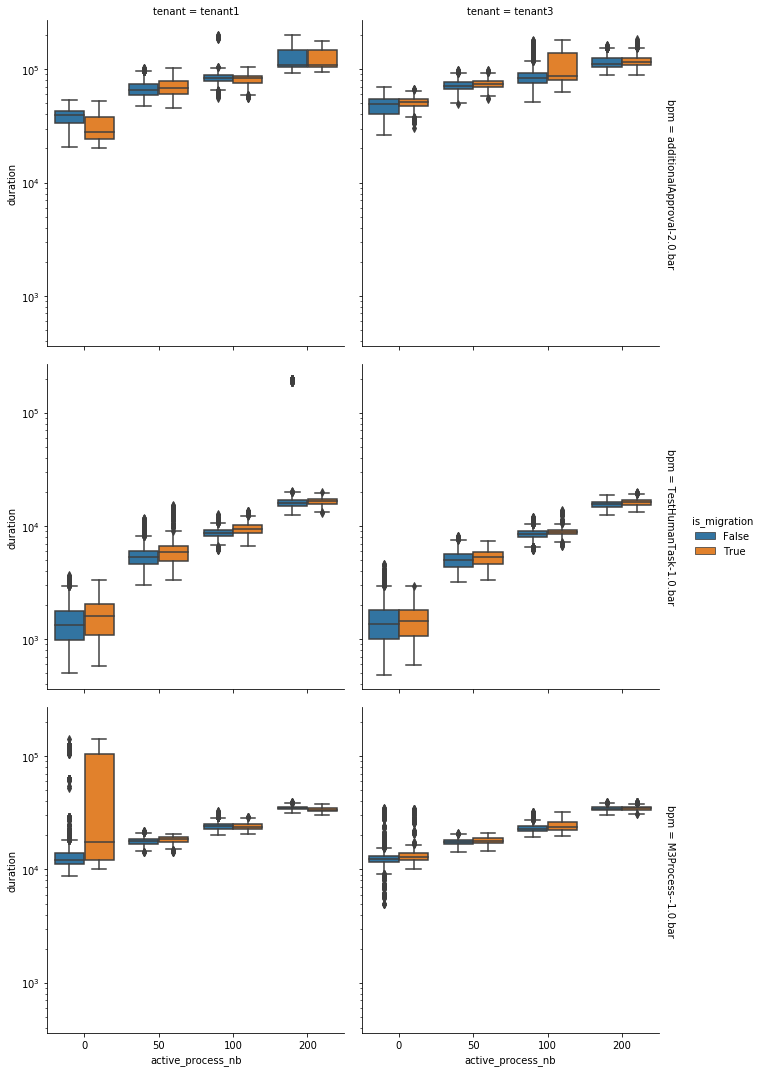

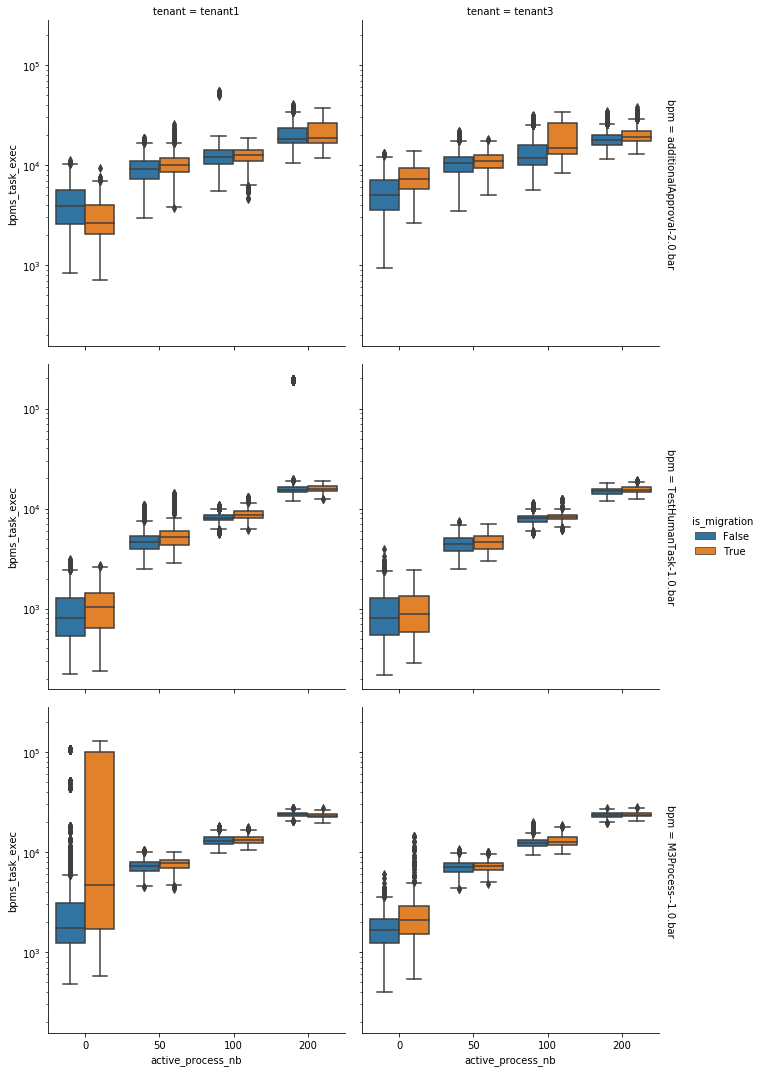

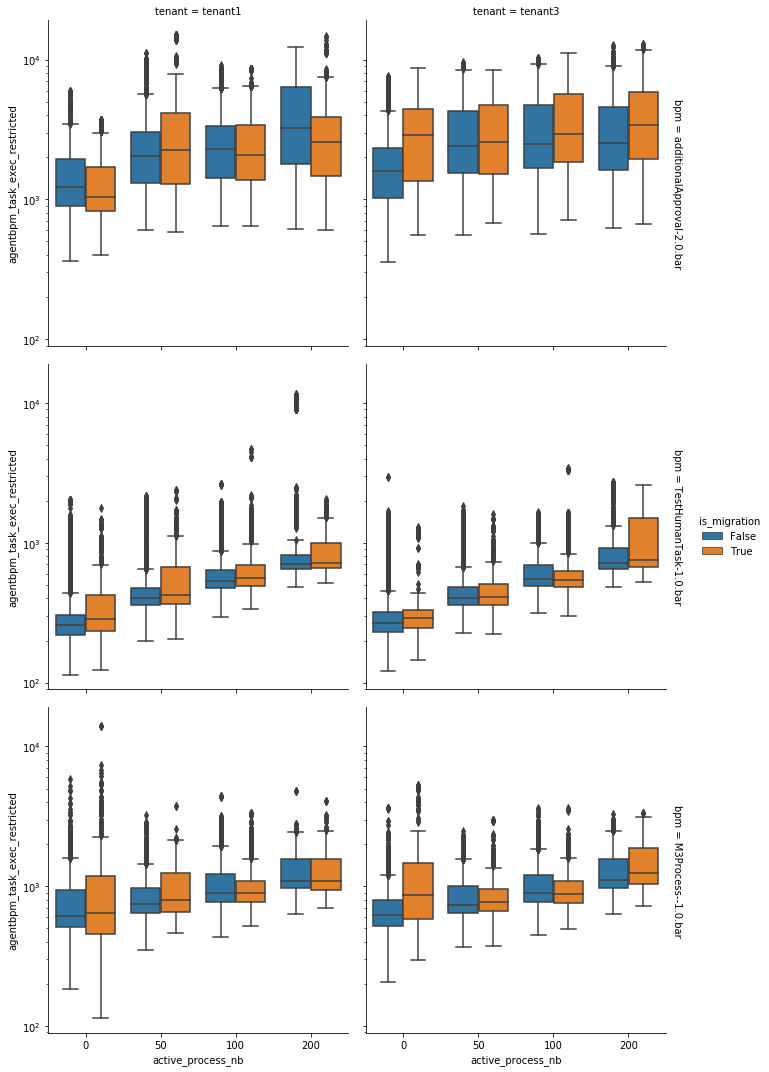

In [16]:
all_data_restricted = all_data_restrict[(all_data_restrict.duration< 200000) & (all_data_restrict.agentbpm_task_exec_restricted< 15000)
                                       &(all_data_restrict.nb.isin([25,50,100,200,0]))]
g= sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="duration", data=all_data_restricted, kind="box", margin_titles=True)
g.set(yscale="log")
g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="bpms_task_exec", data=all_data_restricted, kind="box", margin_titles=True)
g.set(yscale="log")
g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="agentbpm_task_exec_restricted", data=all_data_restricted, kind="box", margin_titles=True)
g.set(yscale="log")
#sns.factorplot("active_process_nb",hue="bpm", y="agentbpm_task_exec_restricted", data=all_data_migr_minus30, kind="box")

In [17]:
all_data_restricted.groupby(["bpm","active_process_nb"])[["experiment"]].describe()

experiment         \
                                                  count unique   
bpm                        active_process_nb                     
M3Process--1.0.bar         0                       7285      5   
                           50                      7066      5   
                           100                     8137      5   
                           200                     9205      5   
TestHumanTask-1.0.bar      0                      10780      5   
                           50                     10845      5   
                           100                    11693      5   
                           200                    11688      5   
additionalApproval-2.0.bar 0                       7535      3   
                           50                     12448      4   
                           100                    14770      5   
                           200                    13612      5   

                                                                                         \
                                                                                    top   
bpm                        active_process_nb                                              
M3Process--1.0.bar         0                                   xp3_m_35_100_0_M3Process   
                           50                                 xp3_m_35_100_50_M3Process   
                           100                        xp3_migr_23-100_100_100_M3Process   
                           200                        xp3_migr_22-100_100_200_M3Process   
TestHumanTask-1.0.bar      0                        xp3_migr_21-100_100_0_TestHumanTask   
                           50                             xp3_m_35_100_50_TestHumanTask   
                           100                           xp3_m_34_100_100_TestHumanTask   
                           200                    xp3_migr_23-100_100_200_TestHumanTask   
additionalApproval-2.0.bar 0                          xp3_m_31_100_0_additionalApproval   
                           50                 xp3_migr_33-100_100_50_additionalApproval   
                           100                      xp3_m_31_100_100_additionalApproval   
                           200                      xp3_m_32_100_200_additionalApproval   

                                                    
                                              freq  
bpm                        active_process_nb        
M3Process--1.0.bar         0                  2258  
                           50                 1591  
                           100                1692  
                           200                1880  
TestHumanTask-1.0.bar      0                  2225  
                           50                 2386  
                           100                2444  
                           200                2638  
additionalApproval-2.0.bar 0                  3154  
                           50                 3216  
                           100                3492  
                           200                3643

In [18]:
all_data_restricted.groupby(["bpm","active_process_nb","tenant","is_migration"]).describe()

agent_nb  \
                                                                     count   
bpm                        active_process_nb tenant  is_migration            
M3Process--1.0.bar         0                 tenant1 False          2926.0   
                                                     True            953.0   
                                             tenant3 False          2951.0   
                                                     True            455.0   
                           50                tenant1 False          3058.0   
                                                     True            835.0   
                                             tenant3 False          2470.0   
                                                     True            703.0   
                           100               tenant1 False          2855.0   
                                                     True           1129.0   
                                             tenant3 False          2995.0   
                                                     True           1158.0   
                           200               tenant1 False          2906.0   
                                                     True           1685.0   
                                             tenant3 False          2935.0   
                                                     True           1679.0   
TestHumanTask-1.0.bar      0                 tenant1 False          4785.0   
                                                     True            570.0   
                                             tenant3 False          4780.0   
                                                     True            645.0   
                           50                tenant1 False          4270.0   
                                                     True            880.0   
                                             tenant3 False          4712.0   
                                                     True            983.0   
                           100               tenant1 False          4569.0   
                                                     True           1173.0   
                                             tenant3 False          4738.0   
                                                     True           1213.0   
                           200               tenant1 False          3751.0   
                                                     True           1484.0   
                                             tenant3 False          4627.0   
                                                     True           1826.0   
additionalApproval-2.0.bar 0                 tenant1 False          2588.0   
                                                     True            504.0   
                                             tenant3 False          3437.0   
                                                     True           1006.0   
                           50                tenant1 False          4609.0   
                                                     True           1468.0   
                                             tenant3 False          4563.0   
                                                     True           1808.0   
                           100               tenant1 False          4642.0   
                                                     True           1732.0   
                                             tenant3 False          5748.0   
                                                     True           2648.0   
                           200               tenant1 False          3292.0   
                                                     True           1701.0   
                                             tenant3 False          5782.0   
                                                     True           2837.0   

                                                                               \
      

In [29]:
all_data_restricted[all_data_restricted.is_migration == True].groupby(["bpm","tenant"])["agentbpm_task_exec_restricted"].describe()

count         mean          std    min  \
bpm                        tenant                                             
M3Process--1.0.bar         tenant1  4602.0  1126.497175   695.887766  115.0   
                           tenant3  3995.0  1208.954443   600.114615  297.0   
TestHumanTask-1.0.bar      tenant1  4107.0   734.108595   464.686439  124.0   
                           tenant3  4667.0   738.623313   491.750984  145.0   
additionalApproval-2.0.bar tenant1  5405.0  2883.677891  2359.188744  398.0   
                           tenant3  8299.0  3702.043740  2349.800269  558.0   

                                       25%     50%      75%      max  
bpm                        tenant                                     
M3Process--1.0.bar         tenant1   738.0   962.0  1302.75  13926.0  
                           tenant3   795.0  1025.0  1533.50   5270.0  
TestHumanTask-1.0.bar      tenant1   439.0   617.0   791.50   4665.0  
                           tenant3   426.5   603.0   791.00   3444.0  
additionalApproval-2.0.bar tenant1  1313.0  2152.0  3484.00  14949.0  
                           tenant3  1751.0  2935.0  5521.00  12882.0

In [30]:
all_data_restricted.groupby(["bpm","active_process_nb"])["agentbpm_task_exec_restricted"].describe()

count         mean  \
bpm                        active_process_nb                         
M3Process--1.0.bar         0                   7285.0   823.295539   
                           50                  7066.0   906.931220   
                           100                 8137.0  1072.879931   
                           200                 9205.0  1328.962303   
TestHumanTask-1.0.bar      0                  10780.0   352.230705   
                           50                 10845.0   530.515814   
                           100                11693.0   695.555546   
                           200                11688.0  1090.790469   
additionalApproval-2.0.bar 0                   7535.0  1990.488653   
                           50                 12448.0  2959.769762   
                           100                14770.0  3180.521801   
                           200                13612.0  3621.077946   

                                                      std    min     25%  \
bpm                        active_process_nb                               
M3Process--1.0.bar         0                   638.419281  115.0   511.0   
                           50                  411.857448  350.0   645.0   
                           100                 479.922158  436.0   769.0   
                           200                 488.021604  631.0   979.0   
TestHumanTask-1.0.bar      0                   279.126569  114.0   225.0   
                           50                  334.891006  197.0   359.0   
                           100                 391.917740  297.0   484.0   
                           200                1362.214028  484.0   656.0   
additionalApproval-2.0.bar 0                  1470.211068  354.0   982.5   
                           50                 2128.190834  560.0  1415.0   
                           100                2123.680465  562.0  1562.0   
                           200                2408.321950  609.0  1687.0   

                                                 50%      75%      max  
bpm                        active_process_nb                            
M3Process--1.0.bar         0                   629.0   934.00  13926.0  
                           50                  750.0  1011.75   3754.0  
                           100                 894.0  1184.00   4439.0  
                           200                1118.0  1679.00   4784.0  
TestHumanTask-1.0.bar      0                   264.0   317.00   2959.0  
                           50                  406.0   485.00   2376.0  
                           100                 542.0   660.00   4665.0  
                           200                 718.0   910.00  11671.0  
additionalApproval-2.0.bar 0                  1524.0  2431.00   8764.0  
                           50                 2205.0  3899.00  14949.0  
                           100                2428.5  4344.50  11227.0  
                           200                2798.0  5632.00  14804.0

In [43]:
all_data.groupby(["bpm","active_process_nb","is_migration"])["agentbpm_task_exec_restricted"].describe()

count  \
bpm                        active_process_nb is_migration             
M3Process--1.0.bar         0                 False          86809.0   
                                             True            1408.0   
                           50                False         111376.0   
                                             True            4508.0   
                           100               False         118041.0   
                                             True            2287.0   
                           200               False         116419.0   
                                             True            3364.0   
TestHumanTask-1.0.bar      0                 False         191469.0   
                                             True            1215.0   
                           50                False         183656.0   
                                             True            1863.0   
                           100               False         183653.0   
                                             True            2386.0   
                           200               False         167173.0   
                                             True            6454.0   
additionalApproval-2.0.bar 0                 False         227117.0   
                                             True            7228.0   
                           50                False         227181.0   
                                             True            4991.0   
                           100               False         229455.0   
                                             True            5691.0   
                           200               False         191079.0   
                                             True            8455.0   

                                                                   mean  \
bpm                        active_process_nb is_migration                 
M3Process--1.0.bar         0                 False           930.200555   
                                             True           1087.706676   
                           50                False          1375.895462   
                                             True          17603.591837   
                           100               False          1168.411755   
                                             True           1046.215129   
                           200               False          1350.620775   
                                             True           1371.373960   
TestHumanTask-1.0.bar      0                 False           353.107448   
                                             True            400.916872   
                           50                False           666.172725   
                                             True            548.333870   
                           100               False           694.600050   
                                             True            719.931266   
                           200               False          1380.821149   
                                             True           6078.086458   
additionalApproval-2.0.bar 0                 False          2772.714403   
                                             True           9117.665053   
                           50                False          3305.184514   
                                             True           4787.851332   
                           100               False          3579.738088   
                                             True           4555.629063   
                           200               False          3907.185855   
                                             True          10120.075458   

                                                                    std  \
bpm                        active_process_nb is_migration                 
M3Process--1.0.bar         0                 False          1301.170890   
                                       

In [45]:
all_data_restricted.groupby(["bpm","tenant","is_migration"])["duration"].describe()

count          mean  \
bpm                        tenant  is_migration                          
M3Process--1.0.bar         tenant1 False         11745.0  24459.492720   
                                   True           4602.0  32070.492612   
                           tenant3 False         11351.0  22220.074531   
                                   True           3995.0  26415.586483   
TestHumanTask-1.0.bar      tenant1 False         17375.0   9854.419683   
                                   True           4107.0  10223.061115   
                           tenant3 False         18857.0   7592.704884   
                                   True           4667.0  10009.746518   
additionalApproval-2.0.bar tenant1 False         15131.0  79460.559447   
                                   True           5405.0  86249.120444   
                           tenant3 False         19530.0  86464.152125   
                                   True           8299.0  96680.085311   

                                                          std      min  \
bpm                        tenant  is_migration                          
M3Process--1.0.bar         tenant1 False         15191.027712   8811.0   
                                   True          26158.966205  10103.0   
                           tenant3 False          8483.893806   4914.0   
                                   True           8072.570777  10149.0   
TestHumanTask-1.0.bar      tenant1 False         21983.806181    507.0   
                                   True           5434.317442    577.0   
                           tenant3 False          5289.368957    487.0   
                                   True           5588.076471    598.0   
additionalApproval-2.0.bar tenant1 False         30585.116385  20623.0   
                                   True          31586.589011  20262.0   
                           tenant3 False         29900.142754  26185.0   
                                   True          32198.521697  30052.0   

                                                     25%      50%       75%  \
bpm                        tenant  is_migration                               
M3Process--1.0.bar         tenant1 False         16706.0  21768.0   33059.0   
                                   True          19284.0  25308.0   33704.0   
                           tenant3 False         15240.5  21328.0   32144.0   
                                   True          19121.0  26120.0   34308.0   
TestHumanTask-1.0.bar      tenant1 False          2227.5   6958.0    9808.5   
                                   True           5891.0   9682.0   15856.5   
                           tenant3 False          2938.0   6601.0   10475.0   
                                   True           5360.0   9004.0   15763.0   
additionalApproval-2.0.bar tenant1 False         59585.5  79039.0   93179.5   
                                   True          66657.0  84215.0  104790.0   
                           tenant3 False         65681.0  80696.5  107760.0   
                                   True          74336.5  87927.0  116473.5   

                                                      max  
bpm                        tenant  is_migration            
M3Process--1.0.bar         tenant1 False         140719.0  
                                   True          140719.0  
                           tenant3 False          39014.0  
                                   True           39668.0  
TestHumanTask-1.0.bar      tenant1 False         199974.0  
                                   True           19875.0  
                           tenant3 False          18782.0  
                                   True           19954.0  
additionalApproval-2.0.bar tenant1 False         199698.0  
                                   True          178213.0  
                           tenant3 False         180009.0  
                                   True          184357.0

In [ ]:
#all_data.groupby(["tenant","experiment", "type"])["Originator"].nunique()

In [28]:
all_data_migrated_restricted = all_data[(all_data.tenant=="tenant2") & (all_data.duration< 200000) & (all_data.agentbpm_task_exec_restricted< 15000)
                                       &(all_data.nb.isin([25,50,100,200,0]))]
all_data_migrated_restricted.groupby(["bpm","type_y"])["duration"].describe()

count           mean           std  \
bpm                        type_y                                         
M3Process--1.0.bar         post    10292.0   38449.298581  16217.793217   
                           pre     14630.0   36950.857895  15909.099312   
TestHumanTask-1.0.bar      post    19529.0   12579.335091   9378.176864   
                           pre     19688.0   13892.846099  15594.283558   
additionalApproval-2.0.bar post    17710.0  113370.094128  42819.486590   
                           pre     25749.0  110685.854985  42710.761202   

                                       min      25%       50%       75%  \
bpm                        type_y                                         
M3Process--1.0.bar         post    13657.0  26046.0   34401.0   44808.0   
                           pre      4398.0  24837.0   33933.5   47169.0   
TestHumanTask-1.0.bar      post      581.0   3081.0    9588.0   15921.0   
                           pre       466.0   2969.5   12282.0   19553.5   
additionalApproval-2.0.bar post    22915.0  78601.0  116355.0  146674.0   
                           pre     12907.0  83799.0  114749.0  141261.0   

                                        max  
bpm                        type_y            
M3Process--1.0.bar         post     76321.0  
                           pre      87303.0  
TestHumanTask-1.0.bar      post     32269.0  
                           pre     168560.0  
additionalApproval-2.0.bar post    199938.0  
                           pre     199856.0

In [ ]:
g = sns.FacetGrid(all_data_migrated_restricted, col="tenant", row="experiment", hue="type_y", size=6) 
g = g.map(plt.scatter, "relative_start", "duration", s=1)